Seleccione entre los rios Ebro,Tajo,Duero,Guadiana,Guadalquivir,Miño,Segura,Jucar: Ebro

Ha seleccionado Ebro 
Interte la cantidad que desea eliminar: 120
Interte el nombre del nuevo trasvase: Cuenca-Albacete

Se quitarían 120 m3/s al caudal 426.0, de manera que quedarían 306


Text(0.5,1,'Rios de España y sus caudales')

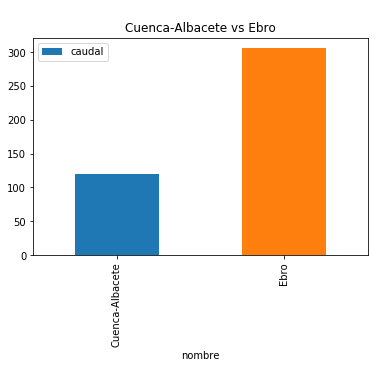

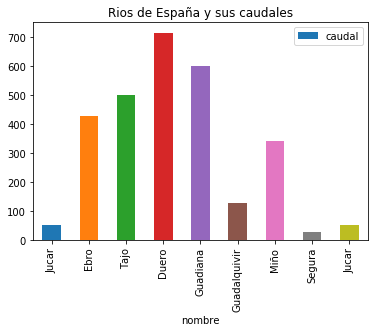

In [14]:
import pymongo 
import pandas as pd
from pymongo import MongoClient
client = MongoClient( 'localhost:27017')
db = client['rios']
rios = db.rios
rios=pd.DataFrame(list(rios.find()))

seleccionRio=str(input("Seleccione entre los rios Ebro,Tajo,Duero,Guadiana,Guadalquivir,Miño,Segura,Jucar: "))
arrayRios=["Ebro","Tajo","Duero","Guadiana","Guadalquivir","Miño","Segura","Jucar"]
print (f"\nHa seleccionado {seleccionRio} ")

def funcionComprobacionRepresentacionRios():
    cantidadCaudalQuitar=int(input("Interte la cantidad que desea eliminar: "))
    
    nombreTrasbase=str(input("Interte el nombre del nuevo trasvase: "))
    
    rioSeleccionadoOrigen=(rios.loc[rios['nombre']==seleccionRio])
    riorioSeleccionadoRecortado=rioSeleccionadoOrigen[['caudal','nombre']]
    caudal=rioSeleccionadoOrigen['caudal'].min()
    caudalFinal=int(caudal)-int(cantidadCaudalQuitar)
    porcentajeCaudal=(int((cantidadCaudalQuitar)*100)/int(caudal))

    if porcentajeCaudal >= 50:
        print ('NO se puede superar el 20%')
    else:
        print(f"\nSe quitarían {cantidadCaudalQuitar} m3/s al caudal {caudal}, de manera que quedarían {caudalFinal}")
        rioNuevo={'caudal':[cantidadCaudalQuitar],'nombre':[nombreTrasbase]}
        df=pd.DataFrame(data=rioNuevo)

        rioSeleccionadoOrigenNuevo={'caudal':[caudalFinal],'nombre':[seleccionRio]}
        df2=pd.DataFrame(data=rioSeleccionadoOrigenNuevo)

        comparacionRioYTrasvase=pd.concat([df,df2],ignore_index=True,sort=True)
        comparacionRioYTrasvase.plot(kind='bar',y='caudal',x='nombre').set_title(f"\n{nombreTrasbase} vs {seleccionRio}")
        
for x in arrayRios:
    if x==seleccionRio:
        funcionComprobacionRepresentacionRios()

riosTotales=rios[['nombre','caudal']].plot(kind='bar',x='nombre',y='caudal').set_title('Rios de España y sus caudales')
riosTotales



   
        
   
